

# Project: Investigate a Dataset (TMDb movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about more than 10,000 movies collected from The Movie Database (TMDb),It consist of 21 columns
 
## Questions can be analyised from this data set:
 
1) what is the most popular movie  and how they are affected with movies duration ?

2) How years effects revenue ?

3) What is the best 15 movies according to profit ?

4) What is the relation between budget and revenue ?

5) What is the most five popular genres ?


In [1]:
# Importing Python necessary packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, i will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that i document my steps carefully

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
#   types and look for instances of missing or possibly errant data.
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# assessing data to get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## I notice:
1) some missing values                                                 .
2) some column that i do not need in my analys



### Data Cleaning (Removing unused data )

In [4]:
# check for duplicated 
df.duplicated().sum()

1

In [5]:
# drop duplicated 
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Duplicated are removed

In [6]:
# the number of missing values 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# creating a list 
dc=[ 'id', 'imdb_id', 'cast', 'homepage', 'director','tagline','keywords', 'overview', 'production_companies','release_date','vote_count', 'vote_average']
# deleting the columns
df=df.drop(columns=dc)

###  Unused column for our analysis are removed

In [8]:
# drop missing values
df.dropna(inplace=True)

In [9]:
# checkingthe number of missing values 
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

###  Missing values are removed

In [10]:
#check and remove zero values 
for column in df.columns:
    df=df.loc[df[column] !=0] 
    print(sum(df[column]==0))

0
0
0
0
0
0
0
0
0


In [11]:
# showing the new data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3854 non-null   float64
 1   budget          3854 non-null   int64  
 2   revenue         3854 non-null   int64  
 3   original_title  3854 non-null   object 
 4   runtime         3854 non-null   int64  
 5   genres          3854 non-null   object 
 6   release_year    3854 non-null   int64  
 7   budget_adj      3854 non-null   float64
 8   revenue_adj     3854 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 301.1+ KB


,popularity,budget,revenue,original_title,runtime,genres,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


### Zero values are removed

### Finding the rows that contain a pipe and store them in "df_pipe"

In [12]:
# the hybrids 
df_pipe = df[df['genres'].str.contains('|')]
df_pipe

,popularity,budget,revenue,original_title,runtime,genres,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...
10822,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,131,Drama,1966,5.038511e+07,2.266436e+08
10828,0.402730,3000000,13000000,Torn Curtain,128,Mystery|Thriller,1966,2.015404e+07,8.733419e+07
10829,0.395668,4653000,6000000,El Dorado,120,Action|Western,1966,3.125892e+07,4.030809e+07
10835,0.299911,12000000,20000000,The Sand Pebbles,182,Action|Adventure|Drama|War|Romance,1966,8.061618e+07,1.343603e+08


### Creating a function to seperate values in  cells that contain a pipe 

In [13]:
#creating a function to seperate values in one cell that contain pipe 
def seprate(column):
    new_columns = (df[column].str.split('|', expand=True).rename(columns=lambda x: f"{column}_{x+1}"))
    return new_columns

In [14]:
df_genres = seprate('genres')
df['genres']=df_genres['genres_1']
print(df['genres'].value_counts().nlargest())

Drama        890
Comedy       787
Action       689
Adventure    314
Horror       275
Name: genres, dtype: int64


In [15]:
# describing the data 
df.describe()

,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,4.220822e+07,1.765393e+08,19.922820,11.282575,4.480925e+07,2.161114e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462367,1.000000e+07,1.360003e+07,95.000000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,2015.000000,4.250000e+08,2.827124e+09


### Creating profit column that we need in answering one of the questions


In [16]:
#creating profit column
df.insert(2,'profit',df['revenue']-df['budget'])

In [17]:
#new dataset
df.head()

,popularity,budget,profit,revenue,original_title,runtime,genres,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1363528810,1513528810,Jurassic World,124,Action,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,120,Action,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,185238201,295238201,Insurgent,119,Adventure,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,1868178225,2068178225,Star Wars: The Force Awakens,136,Action,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1316249360,1506249360,Furious 7,137,Action,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> Now that i've trimmed and cleaned my data, i am ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that i posed in the Introduction section. It is recommended that you be systematic with my approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



## Research Question 1
#### What is the most popular movie  and how they are affected with movies duration?

#### First i will get the row that has the most popularity in 

In [18]:
df[df['popularity']==df.popularity.max()]

,popularity,budget,profit,revenue,original_title,runtime,genres,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1363528810,1513528810,Jurassic World,124,Action,2015,1.379999e+08,1.392446e+09


###  The  most popular movie is  Jurassic World
now we will polt a line to show relation between popularity and runtime

In [19]:
df_run_pop = df.groupby('runtime').mean()['popularity']

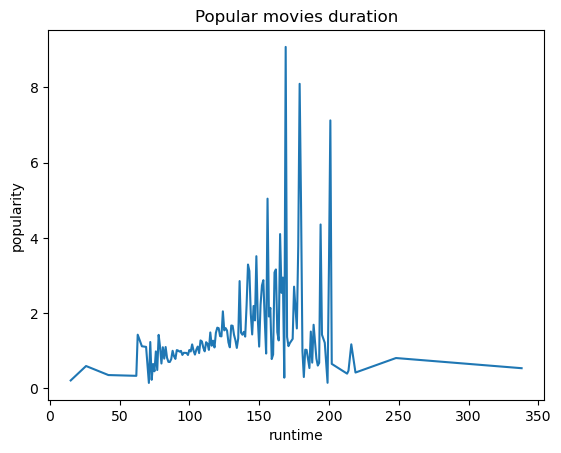

In [20]:
plt.plot(df_run_pop)
plt.title('Popular movies duration')
plt.xlabel('runtime')
plt.ylabel('popularity');

### Popular movies duration is between ( 150 to 200 ) minutes

## Research Question 2
### How years effects revenue?

## The average revenue over the release years

In [21]:
df_rel_yea_rev = df.groupby('release_year')['revenue_adj'].mean()

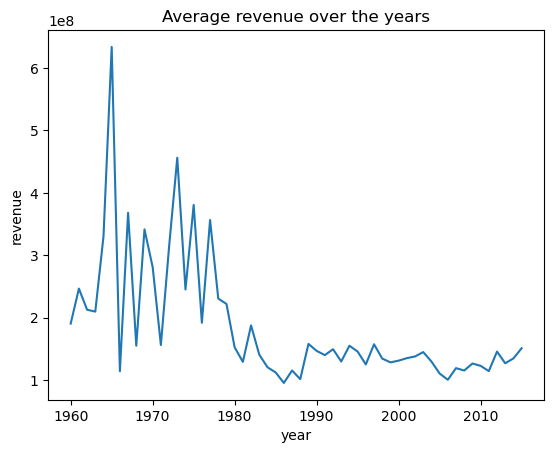

In [22]:
# now we will polt a line to show relation between release_year and revenue_adj
plt.plot(df_rel_yea_rev)
plt.title('Average revenue over the years')
plt.xlabel('year')
plt.ylabel('revenue');

### The revenue is increasing over the years and the greatest is between the years : 1965 to 1975

## Research Question 3
### What is the best 15 movies according to profit ?

In [23]:
# using the profit column to store the most 15 ones in 'most_profit'
most_profit = df.nlargest(15,'profit')

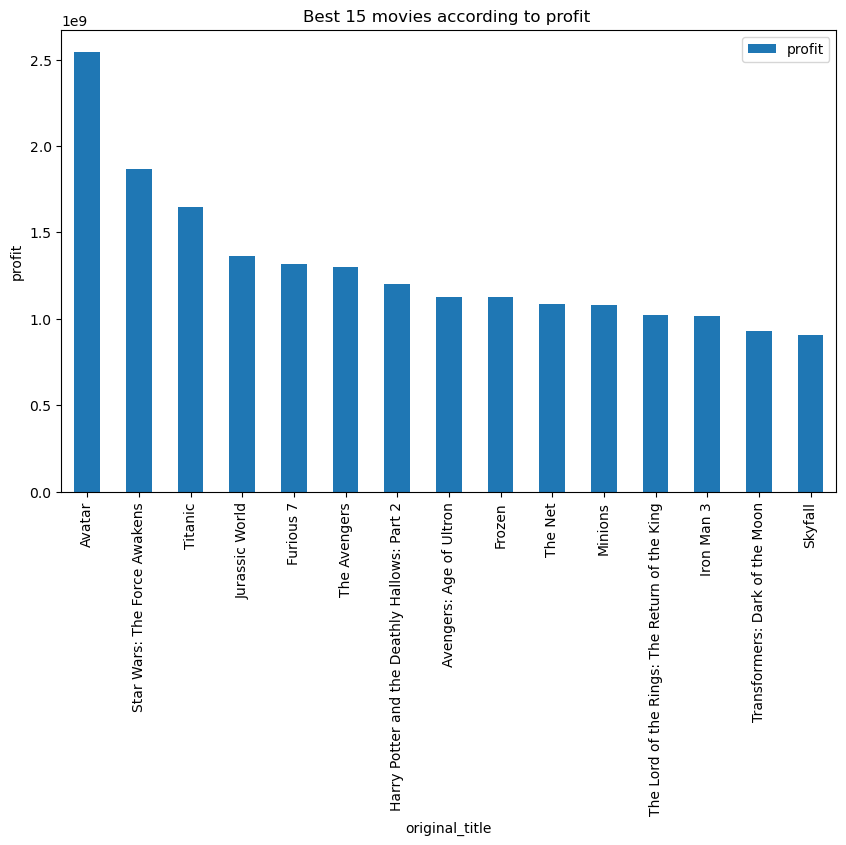

In [24]:
most_profit.index = most_profit.original_title
# plot the the best 15 movies according to profit in a kind bar
most_profit[['original_title','profit']].plot.bar(figsize=(10,6))
plt.title('Best 15 movies according to profit ')
plt.xlabel('original_title')
plt.ylabel('profit');

### The best 15 movies according to profit are:
(Avatar, Star Wars: The Force Awakens, Titanicy, Jurassic World, Furious 7, The Avengers, Harry Potter and the Deathly Hallows: Part 2,Avengers: Age of Ultron, Frozen, The Net, Minions, The Lord of the Rings: The Return of the King, Iron Man 3, Transformers: Dark of the Moon, Skyfall)

## Research Question 4
###  What is the relation between budget and revenue?

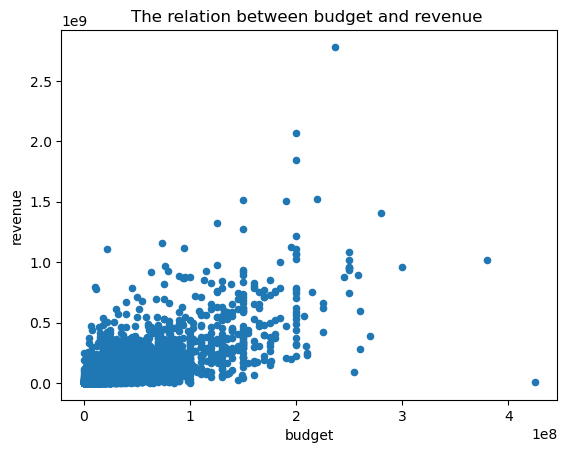

In [25]:
# plotying "budget" and "revenue" in a kind scatter
df.plot(x="budget", y="revenue", kind="scatter")
plt.title('The relation between budget and revenue ')
plt.xlabel('budget')
plt.ylabel('revenue');

### The relation between budget and revenue is correlation positive for most cases


## Research Question 5
### What is the most five popular genres?

#### Getting the most five popular genres by geeting the five largest in popularity and groupby the genres and average it 

In [26]:
df_gen_pop = df.groupby('genres').mean()['popularity'].nlargest(5)

### Plot 'df_gen_pop' in a kind bar

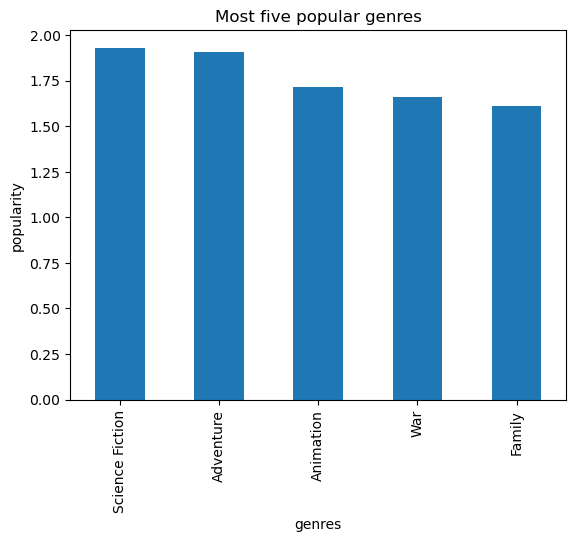

In [27]:
df_gen_pop.plot( kind="bar")
plt.title('Most five popular genres')
plt.xlabel('genres')
plt.ylabel('popularity');

In [28]:
print(df.groupby('genres').mean()['popularity'].nlargest())

genres
Science Fiction    1.931437
Adventure          1.905525
Animation          1.712723
War                1.658497
Family             1.609295
Name: popularity, dtype: float64


most five popular genres are : 
Science Fiction ,
Adventure ,
Animation ,
War ,       
Family ,

<a id='conclusions'></a>
## Conclusions

### After conducting the above questions i reached the following conclusion:
* popular movies duration is between ( 150 to 200 ) minutes
* the revenue is increasing over the years and the greatest is between the years : 1965 to 1975
* the best 15 movies according to profit are:(Avatar, Star Wars: The Force Awakens, Titanicy, Jurassic World, Furious 7, The Avengers, Harry Potter and the Deathly Hallows: Part 2,Avengers: Age of Ultron, Frozen, The Net, Minions, The Lord of the Rings: The Return of the King, Iron Man 3, Transformers: Dark of the Moon, Skyfall)
* the relation between budget and revenue is correlation positive for most cases
* most five popular genres are : Science Fiction , Adventure , Animation , War ,Family


## Limitations: 

while i was conducting an analysis of the above questions like : "What is the most five popular genres?" 
* i couldn't show all the genres popularity in the plot 'most five popular genres' becase it was so crowded in the x label
